# LLN and CLT

## Overview

This lecture illustrates two of the most important results in probability and statistics: 

1. the law of large numbers (LLN) and 
2. the central limit theorem (CLT).

These beautiful theorems lie behind many of the most fundamental results in
econometrics and quantitative economic modeling.

The lecture is based around simulations that show the LLN and CLT in action.

We also demonstrate how the LLN and CLT break down when the assumptions they
are based on do not hold.

This lecture will focus on the univariate case (the multivariate case is treated [in a more advanced lecture](https://python.quantecon.org/lln_clt.html#the-multivariate-case)).

We'll need the following imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

(lln_mr)=
## The law of large numbers

```{index} single: Law of Large Numbers
```

We begin with the law of large numbers, which tells us when sample averages
will converge to their population means.

### The LLN in action

Let's see an example of the LLN in action before we go further.

```{prf:example}
:label: lln_ex_ber

Consider a [Bernoulli random variable](https://en.wikipedia.org/wiki/Bernoulli_distribution) $X$ with parameter $p$.

This means that $X$ takes values in $\{0,1\}$ and $\mathbb P\{X=1\} = p$.

We can think of drawing $X$ as tossing a biased coin where

* the coin falls on "heads" with probability $p$ and
* the coin falls on "tails" with probability $1-p$

We set $X=1$ if the coin is "heads" and zero otherwise.

The (population) mean of $X$ is 

$$
    \mathbb E X 
    = 0 \cdot \mathbb P\{X=0\} + 1 \cdot \mathbb P\{X=1\} = \mathbb P\{X=1\} = p
$$
```

We can generate a draw of $X$ with `scipy.stats` (imported as `st`) as follows:

In [2]:
p = 0.8
X = st.bernoulli.rvs(p)
print(X)

1


In this setting, the LLN tells us if we flip the coin many times, the fraction
of heads that we see will be close to the mean $p$. 

We use $n$ to represent the number of times the coin is flipped.

Let's check this:

In [3]:
n = 1_000_000
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean()) # count the number of 1's and divide by n

0.800374


If we change $p$ the claim still holds:

In [4]:
p = 0.3
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean())

0.299694


Let's connect this to the discussion above, where we said the sample average
converges to the "population mean".

Think of $X_1, \ldots, X_n$ as independent flips of the coin.

The population mean is the mean in an infinite sample, which equals the 
expectation $\mathbb E X$.

The sample mean of the draws $X_1, \ldots, X_n$ is

$$
    \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

In this case, it is the fraction of draws that equal one (the number of heads divided by $n$).

Thus, the LLN tells us that for the Bernoulli trials above

```{math}
:label: exp
    \bar X_n \to \mathbb E X = p
    \qquad (n \to \infty)
```

This is exactly what we illustrated in the code.


(lln_ksl)=
### Statement of the LLN

Let's state the LLN more carefully.

Let $X_1, \ldots, X_n$ be random variables, all of which have the same
distribution.

These random variables can be continuous or discrete.

For simplicity we will 

* assume they are continuous and 
* let $f$ denote their common density function

The last statement means that for any $i$ in $\{1, \ldots, n\}$ and any
numbers $a, b$,


$$ 
  \mathbb P\{a \leq X_i \leq b\} = \int_a^b f(x) dx
$$

(For the discrete case, we need to replace densities with probability mass
functions and integrals with sums.)

Let $\mu$ denote the common mean of this sample.

Thus, for each $i$,

$$
  \mu := \mathbb E X_i = \int_{-\infty}^{\infty} x f(x) dx
$$

The sample mean is

$$
    \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

The next theorem is called Kolmogorov's strong law of large numbers.

(iid-theorem)=
````{prf:theorem}
If $X_1, \ldots, X_n$ are IID and $\mathbb E |X|$ is finite, then

```{math}
:label: lln_as

\mathbb P \left\{ \bar X_n \to \mu \text{ as } n \to \infty \right\} = 1
```
````

Here 

* IID means independent and identically distributed and
* $\mathbb E |X| = \int_{-\infty}^\infty |x| f(x) dx$




### Comments on the theorem

What does the probability one statement in the theorem mean?

Let's think about it from a simulation perspective, imagining for a moment that
our computer can generate perfect random samples (although this [isn't strictly true](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)).

Let's also imagine that we can generate infinite sequences so that the
statement $\bar X_n \to \mu$ can be evaluated.

In this setting, {eq}`lln_as` should be interpreted as meaning that the
probability of the computer producing a sequence where $\bar X_n \to \mu$
fails to occur is zero.

### Illustration

```{index} single: Law of Large Numbers; Illustration
```

Let's illustrate the LLN using simulation.

When we illustrate it, we will use a key idea: the sample mean $\bar X_n$ is
itself a random variable.

The reason $\bar X_n$ is a random variable is that it's a function of the
random variables $X_1, \ldots, X_n$.

What we are going to do now is 

1. pick some fixed distribution to draw each $X_i$ from  
1. set $n$ to some large number

and then repeat the following three instructions.

1. generate the draws $X_1, \ldots, X_n$
1. calculate the sample mean $\bar X_n$ and record its value in an array `sample_means`
1. go to step 1.

We will loop over these three steps $m$ times, where $m$ is some large integer.

The array `sample_means` will now contain $m$ draws of the random variable $\bar X_n$.

If we histogram these observations of $\bar X_n$, we should see that they are clustered around the population mean $\mathbb E X$.

Moreover, if we repeat the exercise with a larger value of $n$, we should see that the observations are even more tightly clustered around the population mean.

This is, in essence, what the LLN is telling us.

To implement these steps, we will use functions.

Our first function generates a sample mean of size $n$ given a distribution.

In [5]:
def draw_means(X_distribution,  # The distribution of each X_i
               n):              # The size of the sample mean

    # Generate n draws: X_1, ..., X_n
    X_samples = X_distribution.rvs(size=n)

    # Return the sample mean
    return np.mean(X_samples)

Now we write a function to generate $m$ sample means and histogram them.

In [6]:
def generate_histogram(X_distribution, n, m): 

    # Compute m sample means

    sample_means = np.empty(m)
    for j in range(m):
      sample_means[j] = draw_means(X_distribution, n) 

    # Generate a histogram

    fig, ax = plt.subplots()
    ax.hist(sample_means, bins=30, alpha=0.5, density=True)
    μ = X_distribution.mean()  # Get the population mean
    σ = X_distribution.std()    # and the standard deviation
    ax.axvline(x=μ, ls="--", c="k", label=fr"$\mu = {μ}$")
     
    ax.set_xlim(μ - σ, μ + σ)
    ax.set_xlabel(r'$\bar X_n$', size=12)
    ax.set_ylabel('density', size=12)
    ax.legend()
    plt.show()

Now we call the function.

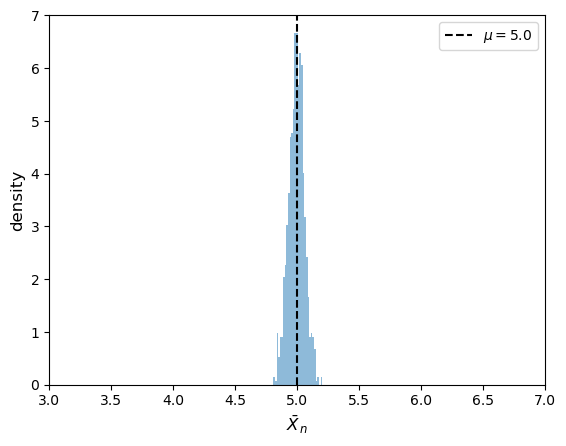

In [7]:
# pick a distribution to draw each $X_i$ from
X_distribution = st.norm(loc=5, scale=2) 
# Call the function
generate_histogram(X_distribution, n=1_000, m=1000)

We can see that the distribution of $\bar X$ is clustered around $\mathbb E X$
as expected.

Let's vary `n` to see how the distribution of the sample mean changes.

We will use a [violin plot](https://intro.quantecon.org/prob_dist.html#violin-plots) to show the different distributions.

Each distribution in the violin plot represents the distribution of $X_n$ for some $n$, calculated by simulation.

In [8]:
def means_violin_plot(distribution,  
                      ns = [1_000, 10_000, 100_000],
                      m = 10_000):

    data = []
    for n in ns:
        sample_means = [draw_means(distribution, n) for i in range(m)]
        data.append(sample_means)

    fig, ax = plt.subplots()

    ax.violinplot(data)
    μ = distribution.mean()
    ax.axhline(y=μ, ls="--", c="k", label=fr"$\mu = {μ}$")

    labels=[fr'$n = {n}$' for n in ns]

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)


    plt.subplots_adjust(bottom=0.15, wspace=0.05)

    ax.set_ylabel('density', size=12)
    ax.legend()
    plt.show()

Let's try with a normal distribution.

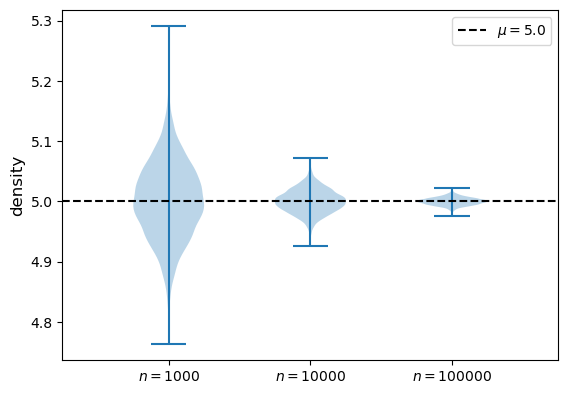

In [9]:
means_violin_plot(st.norm(loc=5, scale=2))

As $n$ gets large, more probability mass clusters around the population mean $\mu$.

Now let's try with a Beta distribution.

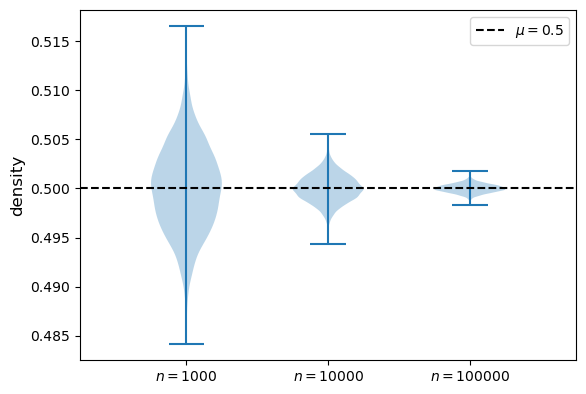

In [10]:
means_violin_plot(st.beta(6, 6))

We get a similar result.

## Breaking the LLN

We have to pay attention to the assumptions in the statement of the LLN.

If these assumptions do not hold, then the LLN might fail.

### Infinite first moment

As indicated by the theorem, the LLN can break when $\mathbb E |X|$ is not finite.

We can demonstrate this using the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution).

The Cauchy distribution has the following property:

If $X_1, \ldots, X_n$ are IID and Cauchy, then so is $\bar X_n$.

This means that the distribution of $\bar X_n$ does not eventually concentrate on a single number.

Hence the LLN does not hold.

The LLN fails to hold here because the assumption $\mathbb E|X| < \infty$ is violated by the Cauchy distribution.

### Failure of the IID condition

The LLN can also fail to hold when the IID assumption is violated.

```{prf:example}
:label: lln_ex_fail

$$
    X_0 \sim N(0,1)
    \quad \text{and} \quad
    X_i = X_{i-1} \quad \text{for} \quad i = 1, ..., n
$$

In this case,

$$
    \bar X_n = \frac{1}{n} \sum_{i=1}^n X_i = X_0 \sim N(0,1)
$$

Therefore, the distribution of $\bar X_n$ is $N(0,1)$ for all $n$!
```

Does this contradict the LLN, which says that the distribution of $\bar X_n$
collapses to the single point $\mu$?

No, the LLN is correct --- the issue is that its assumptions are not
satisfied.

In particular, the sequence $X_1, \ldots, X_n$ is not independent.


```{note}
:name: iid_violation

Although in this case the violation of IID breaks the LLN, there *are* situations
where IID fails but the LLN still holds.

We will show an example in the [exercise](lln_ex3).
```

## Central limit theorem

```{index} single: Central Limit Theorem
```

Next, we turn to the central limit theorem (CLT), which tells us about the
distribution of the deviation between sample averages and population means.


### Statement of the theorem

The central limit theorem is one of the most remarkable results in all of mathematics.

In the IID setting, it tells us the following:


````{prf:theorem}
:label: statement_clt

If $X_1, \ldots, X_n$ is IID with common mean $\mu$ and common variance
$\sigma^2 \in (0, \infty)$, then

```{math}
:label: lln_clt

\sqrt{n} ( \bar X_n - \mu ) \stackrel { d } {\to} N(0, \sigma^2)
\quad \text{as} \quad
n \to \infty
```
````

Here $\stackrel { d } {\to} N(0, \sigma^2)$ indicates [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution) to a centered (i.e., zero mean) normal with standard deviation $\sigma$.


The striking implication of the CLT is that for any distribution with
finite [second moment](https://en.wikipedia.org/wiki/Moment_(mathematics)), the simple operation of adding independent
copies always leads to a Gaussian(Normal) curve.




### Simulation 1

Since the CLT seems almost magical, running simulations that verify its implications is one good way to build understanding.

To this end, we now perform the following simulation

1. Choose an arbitrary distribution $F$ for the underlying observations $X_i$.
1. Generate independent draws of $Y_n := \sqrt{n} ( \bar X_n - \mu )$.
1. Use these draws to compute some measure of their distribution --- such as a histogram.
1. Compare the latter to $N(0, \sigma^2)$.

Here's some code that does exactly this for the exponential distribution
$F(x) = 1 - e^{- \lambda x}$.

(Please experiment with other choices of $F$, but remember that, to conform with the conditions of the CLT, the distribution must have a finite second moment.)

(sim_one)=

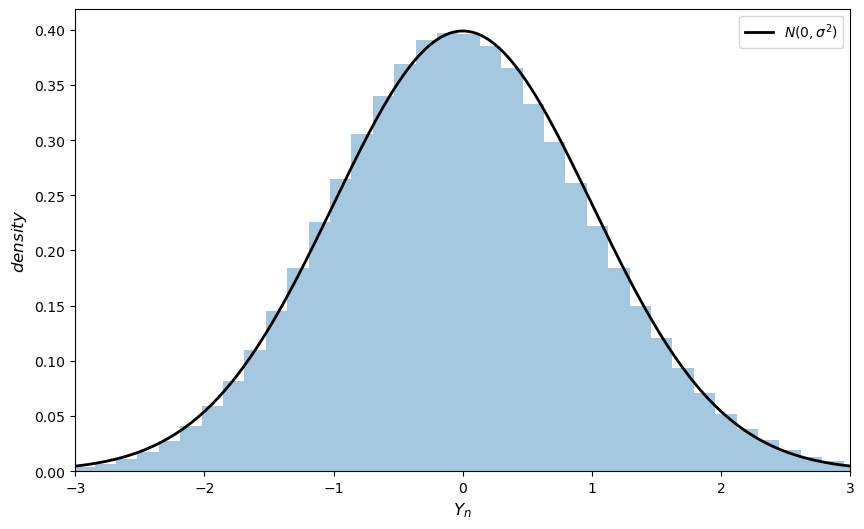

In [11]:
# Set parameters
n = 250         # Choice of n
k = 1_000_000        # Number of draws of Y_n
distribution = st.expon(2) # Exponential distribution, λ = 1/2
μ, σ = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 
        'k-', lw=2, label='$N(0, \sigma^2)$')
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel(r"$density$", size=12)

ax.legend()

plt.show()

(Notice the absence of for loops --- every operation is vectorized, meaning that the major calculations are all shifted to fast C code.)

The fit to the normal density is already tight and can be further improved by increasing `n`.


## Exercises



```{exercise} 
:label: lln_ex1

Repeat the simulation [above](sim_one) with the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).

You can choose any $\alpha > 0$ and $\beta > 0$.
```

```{solution-start} lln_ex1
:class: dropdown
```

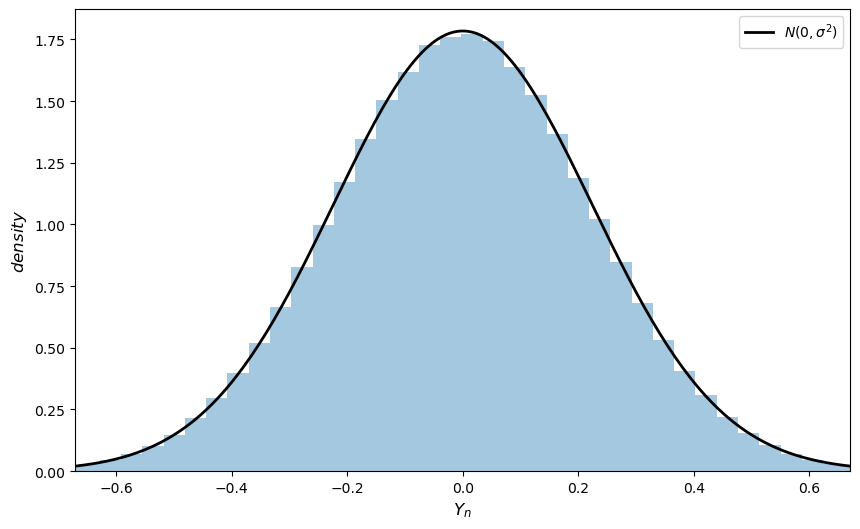

In [12]:
# Set parameters
n = 250         # Choice of n
k = 1_000_000        # Number of draws of Y_n
distribution = st.beta(2,2) # We chose Beta(2, 2) as an example
μ, σ = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel(r"$density$", size=12)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

```{solution-end}
```

````{exercise} 
:label: lln_ex2

At the start of this lecture we discussed Bernoulli random variables.

NumPy doesn't provide a `bernoulli` function that we can sample from.

However, we can generate a draw of Bernoulli $X$ using NumPy via

```python3
U = np.random.rand()
X = 1 if U < p else 0
print(X)
```

Explain why this provides a random variable $X$ with the right distribution.
````

```{solution-start} lln_ex2
:class: dropdown
```

We can write $X$ as $X = \mathbf 1\{U < p\}$ where $\mathbf 1$ is the
[indicator function](https://en.wikipedia.org/wiki/Indicator_function) (i.e.,
1 if the statement is true and zero otherwise).

Here we generated a uniform draw $U$ on $[0,1]$ and then used the fact that

$$
\mathbb P\{0 \leq U < p\} = p - 0 = p
$$

This means that $X = \mathbf 1\{U < p\}$ has the right distribution.

```{solution-end}
```



```{exercise} 
:label: lln_ex3

We mentioned above that LLN can still hold sometimes when IID is violated.

Let's investigate this claim further.

Consider the AR(1) process 

$$
    X_{t+1} = \alpha + \beta X_t + \sigma \epsilon _{t+1}
$$

where $\alpha, \beta, \sigma$ are constants and $\epsilon_1, \epsilon_2,
\ldots$ are IID and standard normal.

Suppose that

$$
    X_0 \sim N \left(\frac{\alpha}{1-\beta}, \frac{\sigma^2}{1-\beta^2}\right)
$$

This process violates the independence assumption of the LLN
(since $X_{t+1}$ depends on the value of $X_t$).

However, the next exercise teaches us that LLN type convergence of the sample
mean to the population mean still occurs.

1. Prove that the sequence $X_1, X_2, \ldots$ is identically distributed.
2. Show that LLN convergence holds using simulations with $\alpha = 0.8$, $\beta = 0.2$.

```

```{solution-start} lln_ex3
:class: dropdown
```

**Q1 Solution**

Regarding part 1, we claim that $X_t$ has the same distribution as $X_0$ for
all $t$.

To construct a proof, we suppose that the claim is true for $X_t$.

Now we claim it is also true for $X_{t+1}$.

Observe that we have the correct mean:

$$
\begin{aligned}
    \mathbb E X_{t+1} &= \alpha + \beta \mathbb E X_t \\
    &= \alpha + \beta \frac{\alpha}{1-\beta} \\
    &= \frac{\alpha}{1-\beta}
\end{aligned}
$$ 

We also have the correct variance:

$$
\begin{aligned}
    \mathrm{Var}(X_{t+1}) &= \beta^2 \mathrm{Var}(X_{t}) + \sigma^2\\
    &= \frac{\beta^2\sigma^2}{1-\beta^2} + \sigma^2 \\
    &= \frac{\sigma^2}{1-\beta^2}
\end{aligned}
$$ 

Finally, since both $X_t$ and $\epsilon_0$ are normally distributed and
independent from each other, any linear combination of these two variables is
also normally distributed.

We have now shown that

$$
    X_{t+1} \sim 
    N \left(\frac{\alpha}{1-\beta}, \frac{\sigma^2}{1-\beta^2}\right) 
$$ 

We can conclude this AR(1) process violates the independence assumption but is
identically distributed.

**Q2 Solution**

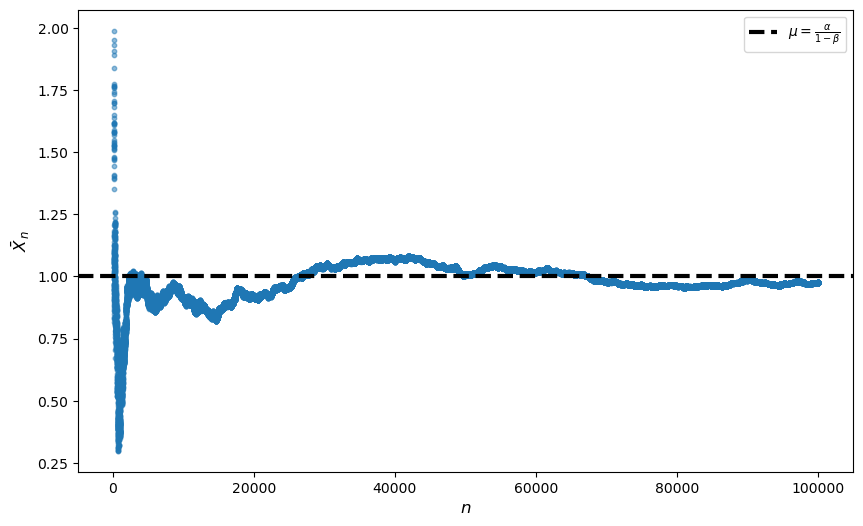

In [13]:
σ = 10
α = 0.8
β = 0.2
n = 100_000

fig, ax = plt.subplots(figsize=(10, 6))
x = np.ones(n)
x[0] = st.norm.rvs(α/(1-β), α**2/(1-β**2))
ϵ = st.norm.rvs(size=n+1)
means = np.ones(n)
means[0] = x[0]
for t in range(n-1):
    x[t+1] = α + β * x[t] + σ * ϵ[t+1]
    means[t+1] = np.mean(x[:t+1])


ax.scatter(range(100, n), means[100:n], s=10, alpha=0.5)

ax.set_xlabel(r"$n$", size=12)
ax.set_ylabel(r"$\bar X_n$", size=12)
yabs_max = max(ax.get_ylim(), key=abs)
ax.axhline(y=α/(1-β), ls="--", lw=3, 
           label=r"$\mu = \frac{\alpha}{1-\beta}$", 
           color = 'black')

plt.legend()
plt.show()

We see the convergence of $\bar x$ around $\mu$ even when the independence assumption is violated.


```{solution-end}
```